**Contents:**
*Pre-processing*
Data Inspection

*Analysis*
1. Temporal trends: Look at monthly/seasonal trends to detect seasonality in sales. (and product purchased)
- correlation between sales and month, outdoor products puchased more during summer etc
2. Customer behavior: Explore lifetime value, purchases per user, and actions leading to purchases.
- see if lifetime value correlates with country?, identify high priority customers of interest
3. Key factors: Investigate factors like pageviews, timeOnSite, and price affecting purchase decisions.
4. Conversion rates: Analyze drop-off points in the purchase funnel.
5. Segment analysis: Examine revenue by different regions and product categories to spot high-value segments

**Data Inspection**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
customer_behavior = pd.read_csv("C:/Users/tanmi/Downloads/cleaned_customer_behavior.csv")

In [5]:
customer_behavior.isna().sum()

users                        0
visitNumber                  0
visitId                      0
date                         0
startTime                    0
continent                    0
subcontinent                 0
country                      0
region                       0
action                       0
transactionId         18534291
transactionRevenue    18572004
timeOnSite             1361277
pageviews                  262
numHits                      0
sessionQuality               0
totals_revenue               0
transactions                 0
brand                        0
price                        0
impression                   0
click                        0
product_name                 0
medium                       0
source                       0
main_category                0
sub_category                 0
subsub_category              0
dtype: int64

In [6]:
customer_behavior.dtypes

users                  uint64
visitNumber             int64
visitId                 int64
date                   object
startTime              object
continent              object
subcontinent           object
country                object
region                 object
action                  int64
transactionId          object
transactionRevenue    float64
timeOnSite            float64
pageviews             float64
numHits                 int64
sessionQuality        float64
totals_revenue        float64
transactions          float64
brand                  object
price                 float64
impression              int64
click                   int64
product_name           object
medium                 object
source                 object
main_category          object
sub_category           object
subsub_category        object
dtype: object

In [5]:
customer_behavior.head()

,users,visitNumber,visitId,date,startTime,continent,subcontinent,country,region,action,...,brand,price,impression,click,product_name,medium,source,main_category,sub_category,subsub_category
0,8098018953492717341,1,1491017061,2017-03-31,2017-04-01 03:24:21,Asia,Southeast Asia,Indonesia,not available in demo dataset,0,...,(not set),21.99,1,0,Category,organic,google,Brands,YouTube,NaN
1,1757329975873508385,1,1490423257,2017-03-24,2017-03-25 06:27:37,Americas,Northern America,United States,not available in demo dataset,0,...,(not set),14.99,1,0,Category,organic,google,Brands,YouTube,NaN
2,5951153772896753075,1,1490414492,2017-03-24,2017-03-25 04:01:32,Americas,Northern America,United States,not available in demo dataset,0,...,(not set),24.99,1,0,Category,organic,google,Apparel,Headgear,NaN
3,1728401204856015969,1,1490389094,2017-03-24,2017-03-24 20:58:14,Americas,Northern America,United States,District of Columbia,0,...,(not set),1.50,1,0,Category,organic,google,Accessories,NaN,NaN
4,1728401204856015969,1,1490389094,2017-03-24,2017-03-24 20:58:14,Americas,Northern America,United States,District of Columbia,0,...,(not set),24.99,1,0,Category,organic,google,Apparel,Men's,Men's-T-Shirts


# **3. Key factors influencing purchases**

## **(a) Numerical Features**

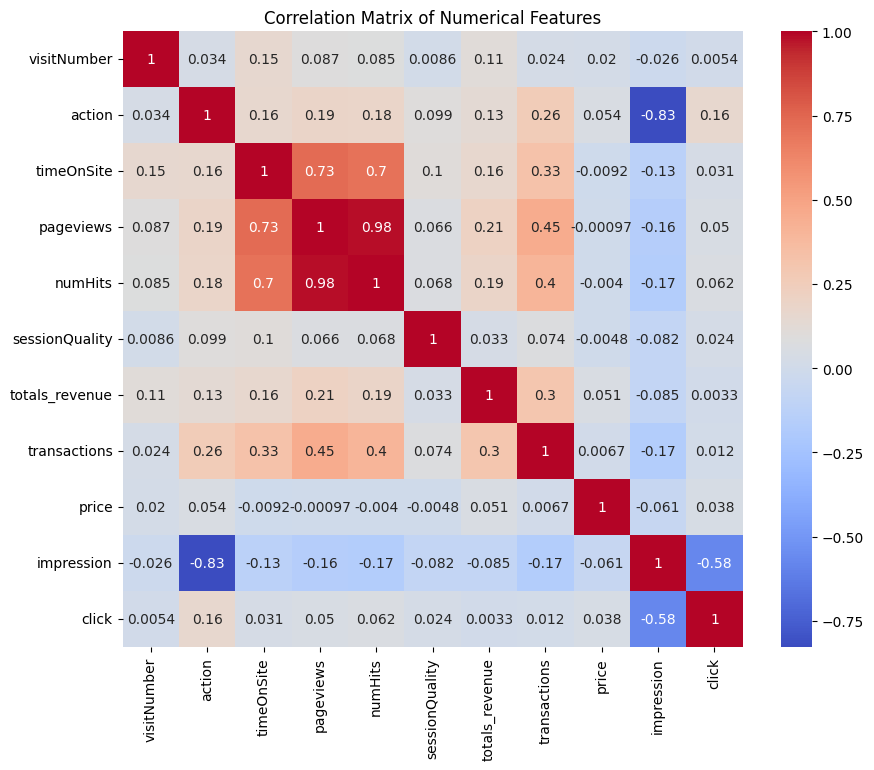

In [7]:
# Selecting numerical columns for correlation analysis
numerical_cols = ['visitNumber', 'action', 'timeOnSite', 
                  'pageviews', 'numHits', 'sessionQuality', 'totals_revenue', 
                  'transactions', 'price', 'impression', 'click']

# Calculating correlation matrix
corr_matrix = customer_behavior[numerical_cols].corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Insights from Correlation Matrix:**

Features like transactions, pageviews, numHits, timeOnSite, action, and visitNumber has larger than 0.1 correlation with totals_revenue, arranged from highest to lowest correlation.

1. 'transactions' represent the total number of ecommerce transactions within each user session. Hence, it is natural to have 0.3 correlation with 'totals_revenue'

2. 'pageviews' represent the total number of page views in each user session. It has a 0.21 correlation with 'totals_revenue' and a 0.45 correlation with 'transactions'. This might imply customers who view more pages have a stronger desire to shop.

3. 'numHits' represent the total number of hits within each user session. Since it has similar meaning as 'pageviews' and the correlation between them is 0.98, we only need to choose 1 out of the 2 features. Correlation between 'numHits' and 'totals_revenue', 'transactions' are 0.19 and 0.4 respectively.

4. 'timeOnSite' represents total time of the session expressed in seconds. It has a 0.16 and 0.33 correlation with 'totals_revenue' and 'transactions' respectively.

5. 'action'. Conversion funnel analysis will be done.

6. 'visitNumber' is the number of times a particular user initiates a session within our e-commerce site. It has a 0.11 correlation with 'totals_revenue' but 0.024 correlation with 'transactions'.

7. 'price' has very minimal positive correlation with 'totals_revenue' and 'transactions'.

***Steps:***

(i) Deep dive into relationship between transactions and revenue (correlation obtained is smaller than expected)

(ii) Explore customer engagement via Pageviews and Time on Site

(iii) Analyze Conversion Funnel via Action Types

(iv) Analyze Visit Number Impact

(v) Analyze customer Price Sensitivity

(vi) Exclude numHits from subsequent analysis

### **(i) Linear Regression between 'totals_revenue' and 'transactions'**

In [8]:
X = customer_behavior[['transactions']]
y = customer_behavior['totals_revenue']

model = LinearRegression()
model.fit(X, y)

print(f"Transaction Impact on Revenue: {model.coef_}")

Transaction Impact on Revenue: [199.47314246]


This shows that an additional transaction will contribute to approximately $199.47 revenue.

### **(ii) Explore customer engagement (pageviews, timeOnSite)**
pageviews and timeOnSite are engagement metrics that influence customer purchases. We want to investigate whether higher engagement leads to more purchases by visualizing how these metrics relate to transactions and totals_revenue.


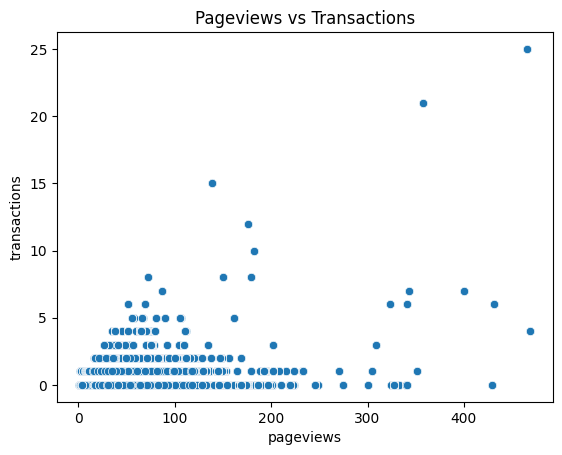

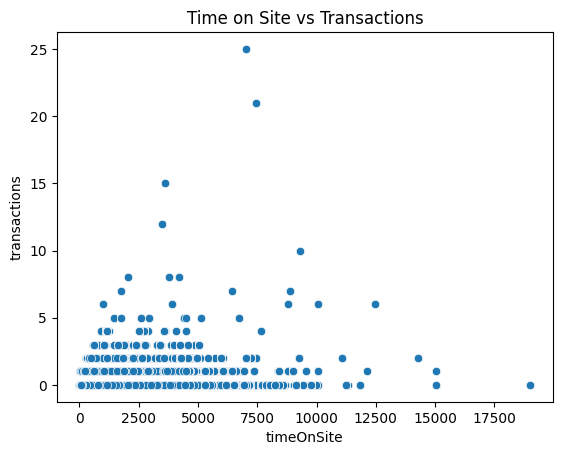

In [9]:
sns.scatterplot(x='pageviews', y='transactions', data=customer_behavior)
plt.title('Pageviews vs Transactions')
plt.show()

sns.scatterplot(x='timeOnSite', y='transactions', data=customer_behavior)
plt.title('Time on Site vs Transactions')
plt.show()

It seems like for longer timeOnSite, customer tendency to transact is higher. This can be seen by decreasing number of datapoints clustered at the lower part of the graph, especially at the lower left corner. Number of dots seem to be consistent for each timeOnSite from 0~6000 seconds. But there seem to be an upward dispersion trend of dots. This observation is the same for pageviews graph.

### **(iii) Analyzing Conversion Funnel via Action Types**
The action variable captures customer behaviors across different stages of the purchase funnel (from product views to completed purchases).

We will perform an elementary conversion funnel analysis to understand drop-offs between stages. For example, how many users add products to the cart but don’t complete the purchase?

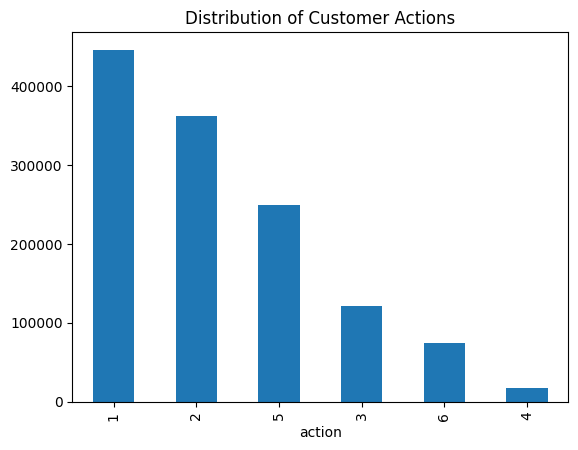

In [10]:
action_counts = customer_behavior['action'][customer_behavior['action']!=0].value_counts()
action_counts.plot(kind='bar')
plt.title('Distribution of Customer Actions')
plt.show()

***We note that here's how different actions are encoded:***

1: Click through of product lists

2: Product detail views

3: Add product(s) to cart

4: Remove product(s) from cart

5: Check out

6: Completed purchase

***There are 2 possible train of actions a customer may take to get to stage '6'***

(i) 1 -> 2 -> 3 -> 5 -> 6

(ii) 1 -> 2 -> 5 -> 6

Note: Not all users add to cart before purchasing. They can purchase directly from the product listing page.

**In particular, we are interested in understanding the conversion rate from action 1 -> 2 ; 2 -> 5 ; 5 -> 6:**

In [11]:
#  Calculate the total number of users at each stage
funnel = customer_behavior.groupby('action')['users'].nunique()

In [12]:
# Calculate conversion rate from clicks (action=1) to product view (action=2)
conversion_rate = (funnel[2] / funnel[1]) * 100
print(f"Conversion rate from product list clicking to product detail views: {conversion_rate:.2f}%")

Conversion rate from product list clicking to product detail views: 99.75%


In [13]:
# Calculate conversion rate from product view (action=2) to checkout (action=5)
conversion_rate = (funnel[5] / funnel[2]) * 100
print(f"Conversion rate from product detail views to checkout: {conversion_rate:.2f}%")

Conversion rate from product detail views to checkout: 18.42%


In [14]:
# Calculate conversion rate from checkout (action=5) to completed purchase (action=6)
conversion_rate = (funnel[6] / funnel[5]) * 100
print(f"Conversion rate from checkout to completed purchase: {conversion_rate:.2f}%")

Conversion rate from checkout to completed purchase: 54.82%


In [15]:
# Investigate the percentage of customers who abandon their carts (action=3 to action=4)
conversion_rate = (funnel[4] / funnel[3]) * 100
print(f"Percentage of customers who abandon their carts: {conversion_rate:.2f}%")

Percentage of customers who abandon their carts: 21.23%


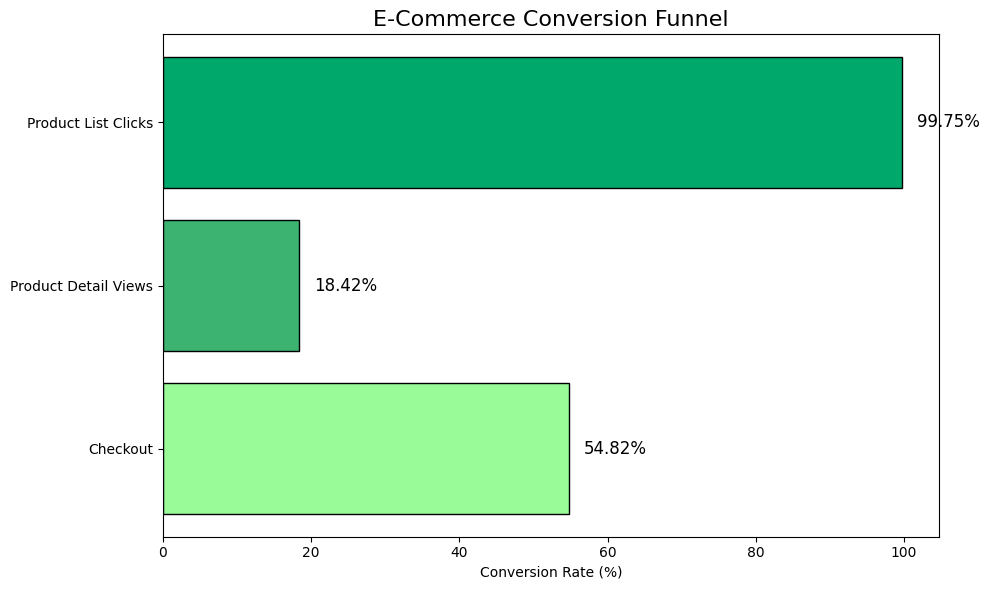

In [38]:
# Conversion rates
steps = ['Product List Clicks', 'Product Detail Views', 'Checkout']
conversion_rates = [99.75, 18.42, 54.82]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw funnel
ax.barh(steps, conversion_rates, color=['#00A86B', '#3CB371', '#98FB98'], edgecolor='black')

# Label the values
for i, v in enumerate(conversion_rates):
    ax.text(v + 2, i, f"{v:.2f}%", color='black', va='center', fontsize=12)

# Add some labels and title
ax.set_xlabel('Conversion Rate (%)')
ax.set_title('E-Commerce Conversion Funnel', fontsize=16)
ax.invert_yaxis()  # Reverse the order to have the highest on top

# Display the funnel plot
plt.tight_layout()
plt.show()

- We can see most users drop off at action 2, which is product detail viewing. Can we offer discounts to customers who stays on the site more than 120 seconds?

- There is also almost 50% drop-off rate at the checkout stage. Can we offer them targeted discounts? e.g. discount for the items they were trying to checkout.

- 20% of the customers abandon their carts. Can discount vouchers be offered too?

### **(iv) Analyzing Visit Number Impact**

- visitNumber has a lower correlation with totals_revenue (0.11) and even lower with transactions (0.024). This suggests that repeat visits don’t always guarantee higher revenue.

- Hence, we are incentivized to investigate first-time vs repeat customers. Analyze if first-time visitors or returning customers contribute more to revenue. If repeat visitors show low conversions, consider launching targeted re-engagement campaigns.

***To analyze the revenue contribution of first-time visitors versus returning customers based on the visitNumber, we can categorize visitNumber into three groups:***

1. First-time visitors (visitNumber = 1)

2. Occasional visitors (1 < visitNumber ≤ 5)

3. Frequent visitors (visitNumber > 5)

This analysis will help us assess which group contributes the most to revenue and whether repeat visitors show low conversion, prompting potential re-engagement strategies.

***Steps:***

1. Create Categories for Visitors: We’ll create a new column visitor_category based on the criteria provided for visitNumber.

2. Calculate Average Revenue per Group: We’ll group by the visitor_category and calculate the mean and total revenue for each group.

3. Compare Conversion Rates: Using transactions as a proxy for conversions, we’ll compare the conversion rate across visitor categories.

4. Interpret Findings: Depending on the results, we can suggest re-engagement campaigns for visitors with low conversion rates.

In [16]:
# Create a new column 'visitor_category'
customer_behavior['visitor_category'] = pd.cut(customer_behavior['visitNumber'], 
                                bins=[0, 1, 5, customer_behavior['visitNumber'].max()], 
                                labels=['First-time', 'Occasional', 'Frequent'], 
                                include_lowest=True)

# Group by visitor_category and calculate mean and total revenue
revenue_stats = customer_behavior.groupby('visitor_category')['totals_revenue'].agg(['mean', 'sum']).reset_index()

# Calculate conversion rates (based on transactions)
conversion_stats = customer_behavior.groupby('visitor_category')['transactions'].agg(['mean', 'sum']).reset_index()

# Merge the results
stats = pd.merge(revenue_stats, conversion_stats, on='visitor_category')

# Print or visualize the result
print(stats)


C:\Users\tanmi\AppData\Local\Temp\ipykernel_16172\1314411061.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_stats = customer_behavior.groupby('visitor_category')['totals_revenue'].agg(['mean', 'sum']).reset_index()
C:\Users\tanmi\AppData\Local\Temp\ipykernel_16172\1314411061.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_stats = customer_behavior.groupby('visitor_category')['transactions'].agg(['mean', 'sum']).reset_index()


  visitor_category     mean_x         sum_x    mean_y     sum_y
0       First-time   9.422686  1.221091e+08  0.054284  703467.0
1       Occasional  33.769993  1.489856e+08  0.160217  706842.0
2         Frequent  86.995585  1.076936e+08  0.225422  279054.0


- Revenue contribution: Frequent visitors dominate, loyalty programs may be beneficial.

- Conversion rates: Occasional or frequent visitors show moderate conversions, with that of frequent visitors being higher. There is room for improvement. Consider re-engagement campaigns to increase their engagement and conversion rates.

### **(v) Analyzing Customer Price Sensitivity**

<Axes: title={'center': 'Price Sensitivity and Revenue'}, xlabel='price'>

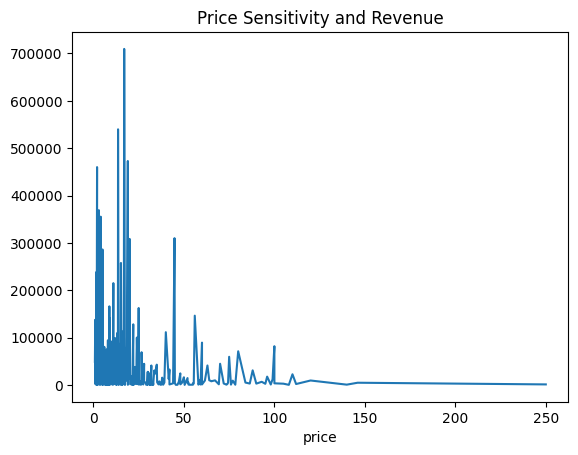

In [17]:
price_sensitivity_1 = customer_behavior[customer_behavior['action'] == 6].groupby('price')['transactionRevenue'].sum()
price_sensitivity_1.plot(kind='line', title='Price Sensitivity and Revenue')

<Axes: title={'center': 'Price Sensitivity and Transactions'}, xlabel='price'>

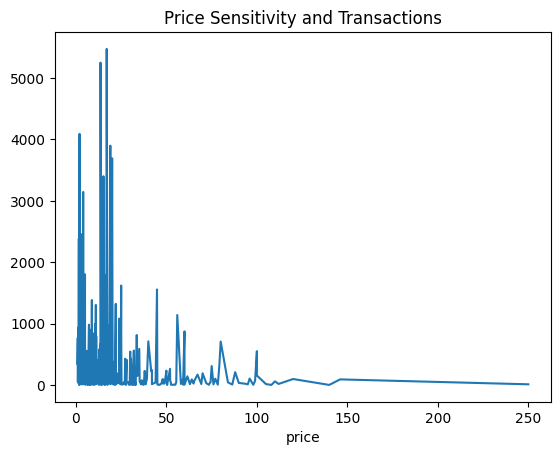

In [33]:
price_sensitivity_2 = customer_behavior[customer_behavior['action'] == 6].groupby('price')['transactions'].sum()
price_sensitivity_2.plot(kind='line', title='Price Sensitivity and Transactions')

Existing customers cluster around purchasing products of price ranging from  0 to 25. There are also some customers who buy products priced from 25 to 100. Overall, customers are very price sensitive as there is a sharp decrease in transaction amount when the price of products bypass 25.

### **Actionable Insights:**

1. Increase engagement by optimizing the website to encourage more page views and longer sessions.

2. Improve conversion rates by targeting users who frequently add items to their cart but don’t complete purchases, those who aborted checkouts, those who have a longer timeOnSite (e.g., with personalized offers).

3. Re-engage repeat visitors by offering loyalty programs or special discounts.

## **(b) Categorical Features**

Analyze the contribution of different customer segments (by region, product categories, etc.) to totals_revenue and transactions to identify key drivers and potential opportunities for optimizing revenue or conversion rates.

### **(i) Region**

Analyze revenue or transactions by continent, subcontinent, and country to understand geographical patterns.

In [18]:
# Grouping by Region (continent, subcontinent, country)
region_revenue = customer_behavior.groupby(['continent', 'subcontinent', 'country'])[['totals_revenue', 'transactions']].sum().reset_index()

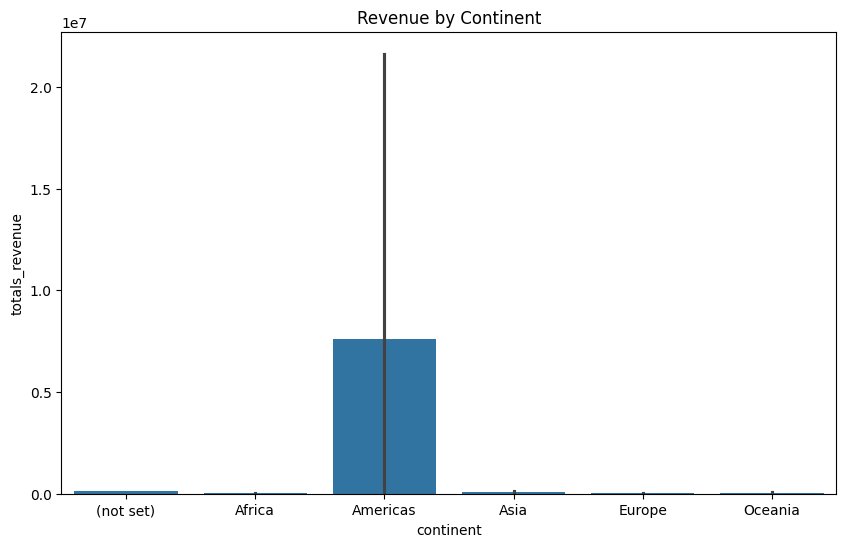

In [19]:
# Plotting by Region
plt.figure(figsize=(10,6))
sns.barplot(data=region_revenue, x='continent', y='totals_revenue')
plt.title('Revenue by Continent')
plt.show()

It seems like customers from US generates most revenue. Let's take a closer look.

In [20]:
# Revenue by country
revenue_by_country = customer_behavior\
    .groupby('country')['totals_revenue'] \
    .sum() \
    .sort_values(ascending=False)[:5]

revenue_by_country

country
United States    3.231290e+08
Venezuela        4.061474e+07
Canada           7.690698e+06
Indonesia        1.084345e+06
Japan            7.863549e+05
Name: totals_revenue, dtype: float64

In [21]:
revenue_by_country/customer_behavior['totals_revenue'].sum()*100

country
United States    85.305962
Venezuela        10.722280
Canada            2.030342
Indonesia         0.286267
Japan             0.207597
Name: totals_revenue, dtype: float64

United States contribute to 85.3% of revenue, followed by Venezuela which contributes 10.7%. They total to 96% of total revenue generated.

In [22]:
# Number of customers by country
customers_by_country = customer_behavior[customer_behavior['transactions'] == 1] \
    .groupby('country')['transactions'] \
    .value_counts() \
    .sort_values(ascending=False)[:5]

customers_by_country

country        transactions
United States  1.0             1259151
Canada         1.0               25514
Venezuela      1.0               11650
Taiwan         1.0                2986
Mexico         1.0                2925
Name: count, dtype: int64

In [23]:
customers_by_country/customers_by_country.sum()*100

country        transactions
United States  1.0             96.692202
Canada         1.0              1.959261
Venezuela      1.0              0.894622
Taiwan         1.0              0.229300
Mexico         1.0              0.224615
Name: count, dtype: float64

United States and Canada alone contribute to almost 99% of transactions. The reason why Venezuela produced more revenue but has less transactions might be due to high-value items purchased. They could be high priority customer segment of interest.

It seems like customer data is skewed. We might have an established presence in the US. Try expanding into other geographies.

### **(ii) Product category**

- Main Category -> Explore how different product categories contribute to overall revenue and transaction counts.
- Sub-Category -> Dive deeper into sub-categories to identify high- and low-performing products.

In [24]:
# Grouping by Main Category
category_revenue = customer_behavior.groupby('main_category')[['totals_revenue', 'transactions']].sum().reset_index()

# Grouping by Sub-Category
subcategory_revenue = customer_behavior.groupby(['main_category', 'sub_category'])[['totals_revenue', 'transactions']].sum().reset_index()

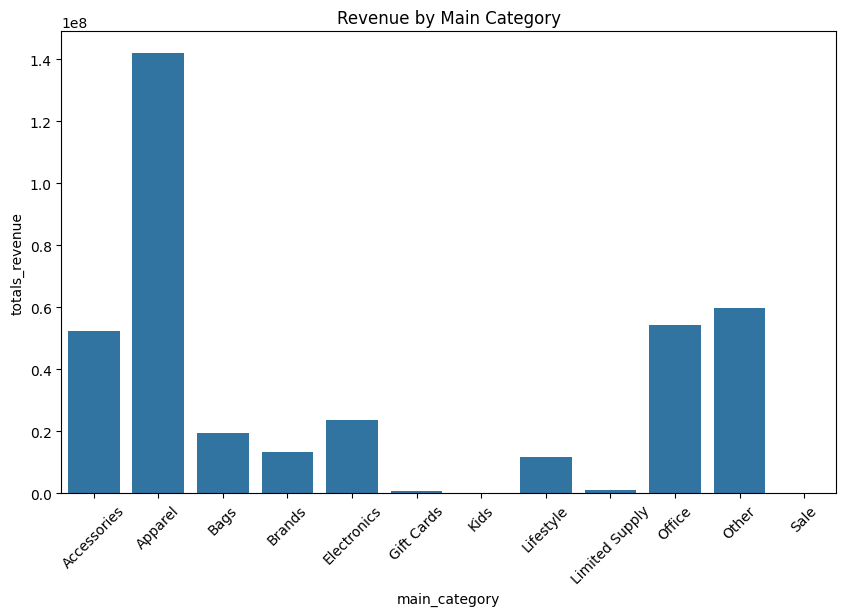

In [25]:
# Plotting Main Category
plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue, x='main_category', y='totals_revenue')
plt.title('Revenue by Main Category')
plt.xticks(rotation=45)
plt.show()

- We see that Apparel generates most revenue, followed by Office, Accessories, and Electronics

- We will further investigate the abovementioned categories

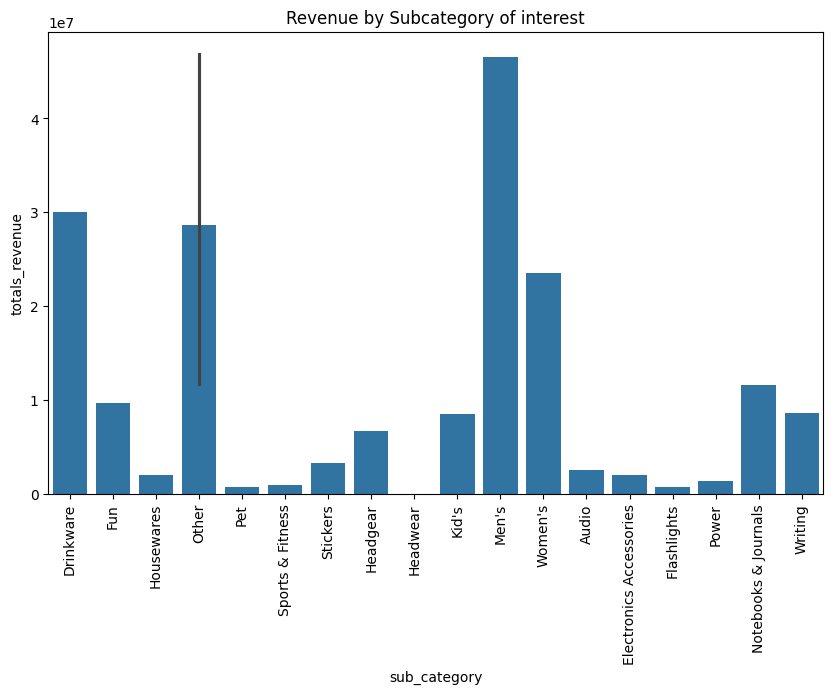

In [26]:
# Plotting Subcategory
subcategory_interested = subcategory_revenue[subcategory_revenue['main_category'].isin(['Accessories','Apparel','Office', 'Electronics'])]

plt.figure(figsize=(10,6))
sns.barplot(data=subcategory_interested, x='sub_category', y='totals_revenue')
plt.title('Revenue by Subcategory of interest')
plt.xticks(rotation=90)
plt.show()

Let's take a closer look.

w.r.t revenue

In [27]:
# Revenue by main category
revenue_by_category = customer_behavior.groupby(['main_category'])['totals_revenue'].sum()

revenue_by_category/revenue_by_category.sum()*100

main_category
Accessories       13.870611
Apparel           37.474537
Bags               5.113898
Brands             3.546220
Electronics        6.282180
Gift Cards         0.167372
Kids               0.001389
Lifestyle          3.086957
Limited Supply     0.257958
Office            14.378950
Other             15.758914
Sale               0.061014
Name: totals_revenue, dtype: float64

44.5% Apparel, 17% Office, 16% Accessories

In [28]:
# Revenue by subcategory
revenue_by_subcategory = customer_behavior.groupby(['main_category','sub_category'])['totals_revenue'].sum()

revenue_by_subcategory/revenue_by_subcategory.sum()*100

main_category   sub_category           
Accessories     Drinkware                   7.918028
                Fun                         2.550068
                Housewares                  0.519487
                Other                       1.594022
                Pet                         0.181092
                Sports & Fitness            0.241264
                Stickers                    0.866649
Apparel         Headgear                    1.754620
                Headwear                    0.000000
                Kid's                       2.245723
                Men's                      12.285565
                Other                      14.991894
                Women's                     6.196735
Bags            Backpacks                   0.667093
                More Bags                   0.824639
                Other                       3.160258
                Shopping and Totes          0.461908
Brands          Android                     0.530363
      

12.3% Men's Apparel, 8% Drinkware, 6.2% Women's Apparel. Contribute to more than 25% of total revenue.

In [29]:
# Revenue by subsubcategory
revenue_by_subsubcategory = customer_behavior.groupby(['main_category','sub_category','subsub_category'])['totals_revenue'].sum()

revenue_by_subsubcategory/revenue_by_subsubcategory.sum()*100

main_category   sub_category             subsub_category           
Accessories     Drinkware                Mugs and Cups                  0.354616
                                         Other                          4.672648
                                         Water Bottles and Tumblers     2.890765
                Fun                      Other                          2.550068
                Housewares               Other                          0.519487
                Other                    Other                          1.594022
                Pet                      Other                          0.181092
                Sports & Fitness         Other                          0.241264
                Stickers                 Other                          0.866649
Apparel         Headgear                 Other                          1.754620
                Headwear                 Other                          0.000000
                Kid's                    

We conclude that Men's T-Shirts, followed by Women's T-Shirts, Water Bottles & Tumblers, Men's Outerwear generate most revenue.

w.r.t transactions

In [30]:
# Conversion by main category
conversion_by_category = customer_behavior.groupby(['main_category'])['transactions'].sum()

conversion_by_category/conversion_by_category.sum()*100

main_category
Accessories       14.888866
Apparel           40.827637
Bags               4.823593
Brands             5.667225
Electronics        6.101708
Gift Cards         0.348889
Kids               0.004499
Lifestyle          3.444849
Limited Supply     0.412759
Office            13.042490
Other             10.300510
Sale               0.136975
Name: transactions, dtype: float64

40%  Apparel, 15% Accessories, 13% Office

In [31]:
# Conversion by subcategory
conversion_by_subcategory = customer_behavior.groupby(['main_category','sub_category'])['transactions'].sum()

conversion_by_subcategory/conversion_by_subcategory.sum()*100

main_category   sub_category           
Accessories     Drinkware                   8.034093
                Fun                         2.687226
                Housewares                  0.707900
                Other                       1.707922
                Pet                         0.250449
                Sports & Fitness            0.323731
                Stickers                    1.177544
Apparel         Headgear                    1.900184
                Headwear                    0.000000
                Kid's                       3.591117
                Men's                      17.196837
                Other                      11.521029
                Women's                     6.618471
Bags            Backpacks                   0.805274
                More Bags                   0.864349
                Other                       2.623592
                Shopping and Totes          0.530377
Brands          Android                     0.761530
      

Men's apparel 17.2%, drinkware 8%, women's apparel 6.6%

In [32]:
# Conversion by subsubcategory
conversion_by_subsubcategory = customer_behavior.groupby(['main_category','sub_category','subsub_category'])['transactions'].sum()

conversion_by_subsubcategory/conversion_by_subsubcategory.sum()*100

main_category   sub_category             subsub_category           
Accessories     Drinkware                Mugs and Cups                  0.523097
                                         Other                          4.786479
                                         Water Bottles and Tumblers     2.724518
                Fun                      Other                          2.687226
                Housewares               Other                          0.707900
                Other                    Other                          1.707922
                Pet                      Other                          0.250449
                Sports & Fitness         Other                          0.323731
                Stickers                 Other                          1.177544
Apparel         Headgear                 Other                          1.900184
                Headwear                 Other                          0.000000
                Kid's                    

We conclude that Men's T-Shirts, followed by Women's T-Shirts, Men's Outerwear generate contributes to most number of transactions.

Results largely tally.

**Combined Commentary on Revenue and Transaction Insights**

We have two tables that provide insights into different aspects of the business:
- One showing **totals_revenue** percentages by category.
- Another showing **number of transactions** percentages by category.

By combining these insights, we can identify the product categories that are not only generating the most revenue but also those that are involved in the most transactions. This dual analysis is key to understanding the overall business performance—highlighting categories with high sales volume (transactions) but possibly lower price points, or those generating high revenue from fewer, higher-priced transactions.

---

**1. Accessories Category:**
- **Revenue Insights:** The top revenue contributors within Accessories are **Water Bottles and Tumblers** (2.89%) and **Mugs and Cups** (0.35%), with **Fun** contributing a significant 2.55%.
- **Transaction Insights:** The **Mugs and Cups** subcategory drives 0.52% of transactions, while **Water Bottles and Tumblers** contribute 2.72%, indicating that customers are making frequent lower-value purchases in this subcategory.
  
**Combined Insight:** Accessories like **Water Bottles and Tumblers** and **Fun** accessories are performing well in both revenue and transactions, making them popular and frequent purchases. **Mugs and Cups**, despite having lower revenue, have a relatively higher percentage of transactions, suggesting these are lower-ticket, high-volume items. A marketing push in these areas could increase both sales volume and revenue.

---

**2. Apparel Category:**
- **Revenue Insights:** **Men's T-Shirts** (6.66%) and **Men's-Outerwear** (2.53%) are the largest revenue drivers.
- **Transaction Insights:** **Men’s T-Shirts** show the highest percentage of transactions at 8.71%, and **Men’s-Outerwear** also contributes significantly to transactions (3.08%).

**Combined Insight:** **Men’s T-Shirts** are a standout category in both revenue and transactions, meaning they are not only popular but also high-ticket items. **Men's-Outerwear** shows a similar trend. Investing more in marketing these subcategories and maintaining sufficient stock levels is essential. On the other hand, subcategories like **Women's-Performance Wear** show lower percentages for both transactions (0.39%) and revenue (0.23%), meaning they might need a re-evaluation or marketing boost to gain more traction.

---

**3. Electronics Category:**
- **Revenue Insights:** The **Other Electronics** subcategory is the largest revenue contributor at 4.55%, while **Audio** contributes just 0.67%.
- **Transaction Insights:** **Other Electronics** also leads in transactions at 4.31%, while **Audio** shows 0.64%.

**Combined Insight:** The **Other Electronics** subcategory is a key performer in both transactions and revenue, indicating a strong appeal across various price points. **Audio**, however, shows a smaller contribution in both transactions and revenue, which may indicate that it is a niche product or requires more effective marketing.

---

**4. Office Category:**
- **Revenue Insights:** **Notebooks & Journals** contribute 3.05% to revenue, while the **Other Office** subcategory dominates with 9.05%.
- **Transaction Insights:** Similarly, the **Other Office** subcategory accounts for 8.81% of transactions, while **Notebooks & Journals** contribute 2.13%.

**Combined Insight:** The **Other Office** subcategory is highly successful in both revenue and transactions, suggesting a broad appeal for general office supplies. **Notebooks & Journals** are also performing well in both metrics. These segments could benefit from further promotion, especially in business-to-business (B2B) channels where bulk purchases might be common.

---

**Conclusion and Recommendations:**

1. **High-Contribution Segments:** 
   - **Apparel** (especially **Men's T-Shirts**) and **Electronics** (specifically **Other Electronics**) are major drivers in both revenue and transactions. These segments should continue to receive significant marketing focus, stock management, and promotional campaigns.
   - **Accessories** such as **Water Bottles and Tumblers** are strong in both metrics, making them key product lines for engagement and revenue growth.

2. **Low-Contribution Segments:**
   - Subcategories like **Pet Accessories** and **Women’s Performance Wear** show lower contributions across both revenue and transactions. These areas may require new product designs, better pricing strategies, or targeted marketing campaigns to boost engagement.

3. **Balanced Growth Strategy:**
   - Categories like **Bags** and **Office Supplies** show steady transaction volumes but moderate revenue. Introducing higher-end products or premium versions could enhance the average transaction value while maintaining volume.

By focusing on the best-performing categories and optimizing underperforming ones, this analysis can help guide marketing strategies, inventory decisions, and product development, ensuring the business maximizes both revenue and customer engagement.

### **Actionable Insights**

**1. Region Analysis:**

- Top Performing Regions: US, Canada and Venezuela

- Underperforming Regions: Europe and Asia

**2. Category Analysis:**

- High-Revenue Categories: Apparel contributes to 45% of total revenue, with Men's t-shirt, Women's t-shirt, and Men's outerwear being the best-selling products. This is then followed by Office and Accessories.

- Low-Revenue Categories: Bags (6%), Electronics (7.5%) and products on sale (0.1%) are underperforming. A targeted promotion could help boost performance.

**3. Customer Segmentation Recommendations**

- High-Revenue Segments: Focus on retaining and expanding these customer groups.
- Low-Revenue Segments: Tailored marketing campaigns or product bundling for underperforming categories.

*For example:*

(i) Geography-Based Promotions: Launch localized campaigns in regions showing potential but low current performance.

(ii) Category-Specific Offers: Provide discounts or bundle offers for products in low-revenue categories to stimulate demand.